In [29]:
import numpy as np
import pandas as pd

data = pd.read_csv('Titanic.csv')

In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


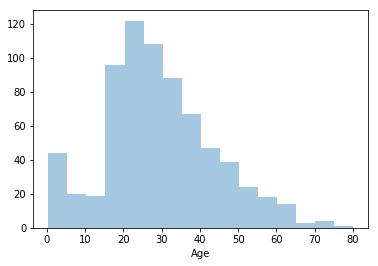

In [31]:
import seaborn as sns 
sns.distplot(data['Age'].dropna(), hist=True, kde=False, bins=16)

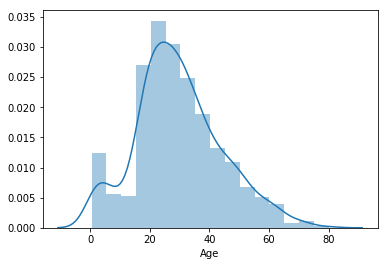

In [32]:
sns.distplot(data['Age'].dropna(), hist=True, kde=True, bins=16)

# Activity: In PDF, where does the y axes numbers come from? For example at Age 20, why the y-value is around 0.030?


In [33]:
def custom_hist(ls, interval):
    hist_ls_dict = dict()
    min_ls = np.min(ls)
    max_ls = np.max(ls)
    print(max_ls)
    I = ((max_ls - min_ls) / interval)
    print(I)
    for j in range(interval):
#         print((min_ls + j*I, min_ls + (j+1) *I))
#         print(np.sum(((min_ls + j*I) <=ls) & (ls <= (min_ls + (j+1) *I))))
        hist_ls_dict[(min_ls + j*I, min_ls + (j+1) *I)]= np.sum(((min_ls + j*I) <=ls) & (ls <= (min_ls + (j+1) *I)))      
    return hist_ls_dict

In [34]:
histo = custom_hist(df['Age'].dropna().values, 16)

80.0
4.97375


In [35]:
histo

{(0.42, 5.39375): 44,
 (5.39375, 10.3675): 20,
 (10.3675, 15.34125): 19,
 (15.34125, 20.315): 96,
 (20.315, 25.28875): 122,
 (25.28875, 30.262500000000003): 108,
 (30.262500000000003, 35.23625): 88,
 (35.23625, 40.21): 67,
 (40.21, 45.18375): 47,
 (45.18375, 50.1575): 39,
 (50.1575, 55.13125): 24,
 (55.13125, 60.105000000000004): 18,
 (60.105000000000004, 65.07875): 14,
 (65.07875, 70.0525): 3,
 (70.0525, 75.02625): 4,
 (75.02625, 80.0): 1}

In [36]:
88/sum(histo.values())/4.97375

0.024779954706185065

# Activity: What percent of passengers are younger than 40?


In [42]:
younger_than_40 = data[data['Age'] <= 40]
below_40_percent = len(younger_than_40)/len(data['Age'].dropna())*100
print('{}% are younger than 40'.format(below_40_percent))

78.99159663865547% are younger than 40


It is not easy to calculate this percentage from PDF as we should compute the area
Cumulative Density Function (CDF)
In above example, we could not easily obtain the percentage from PDF, although it is possible.

With CDF we can

Lets learn CDF by example. CDF computation needs two steps:

1 - For a given array of numbers and a given threshold, Count how many elements in the array is less than the threshold

2 - Change the threshold from the minimum to maximum value of the array

CDF returns the **PROBABILITY** of picking that value or a value _lower_ than it in the data. 

In [76]:
# def cdf(arr, threshold):
#     total = 0
#     for i in range(len(arr)-1):
#         if arr[i] <= threshold:
#             total += 1
#     return total / len(arr) *100

ls_age = df['Age'].dropna().values

def calculate_cdf(x, threshold):
    return np.sum(x <= threshold)


cdf_age = [calculate_cdf(ls_age, r)/len(ls_age) for r in range(int(np.min(ls_age)), int(np.max(ls_age)))]
            

In [77]:
# cdf([1,2,3,4,5,6,7,8,9,10,11,12,23,3245,4356,1243,1243,4356,2134,4567,5467,5467,4567,4567,4567],500)

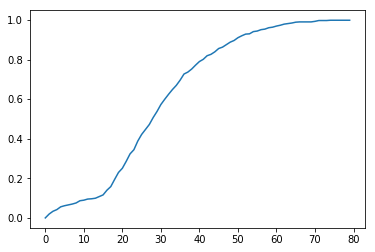

In [78]:
# import matplotlib.pyplot as plt
# ls_age = df['Age'].dropna().values
# cdf_age = cdf(df['Age'].dropna().values, 30)
# plt.plot(range(int(np.min(ls_age)), int(np.max(ls_age))), cdf_age)

import matplotlib.pyplot as plt

plt.plot(range(int(np.min(ls_age)), int(np.max(ls_age))), cdf_age)

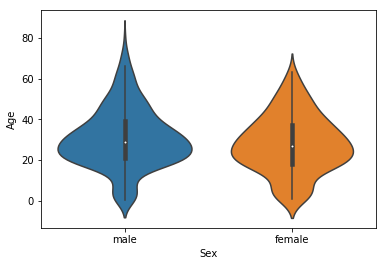

In [80]:
sns.violinplot(x='Sex', y='Age', data=data)

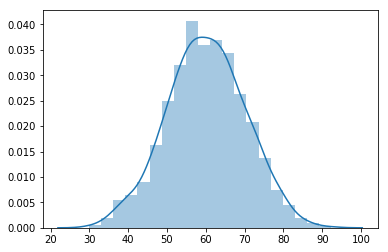

In [82]:
import numpy as np
import seaborn as sns

# Generate 1000 samples with 60 as its mean and 10 as its std
a = np.random.normal(60, 10, 1000)
sns.distplot(a, hist=True, bins=20)

# Activity:
### The intrsuctor of DS, graded students final exam. He is reporting that the mean was 60 (with scale of 100) with standard deviation of 10. What is the probability that students got more than 70?


In [86]:
from scipy.stats import norm

print(norm.sf(70, loc=60, scale=10))
1 - norm.cdf(70, loc=60, scale=10)

0.15865525393145707


0.15865525393145707

# Activity:
### Show that about 68% of the values in a are in [50, 70] range

In [89]:
(norm.cdf(70, loc=60, scale=10) - norm.cdf(50, loc=60, scale=10))*100

68.26894921370858

# If we scale the Normal Ditribution, the result is zero mean and unit std


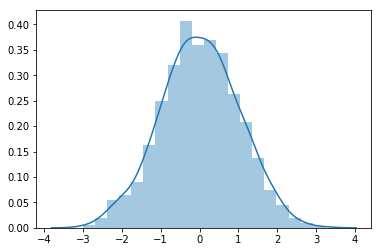

In [91]:
b = (a - 60)/10
sns.distplot(b, hist=True, kde=True, bins=20)

# Z-Distribution
When the samples of our numerical array are Normal with arbitrary mean and std

If scale each element by subtracting elements from the mean and divide over std, then the new array would be a Normal distribution with zero mean, std 1

Z-distribution is another name for standard Normal distribution

# CDF = Comulitive Distribution Function

# PDF = Probability Distribution Function